# Data Analysis - EDA

### COCO 2017 Detection Dataset: A Comprehensive Overview
The COCO (Common Objects in Context) 2017 Detection Dataset is one of the most widely used benchmark datasets for object detection, segmentation, and instance recognition in computer vision. It provides high-quality annotations across diverse images, making it an essential resource for training and evaluating deep learning models, YOLO in this case.

The 2017 version of the COCO detection dataset consists of:
- 118,287 training images (train2017)
- 5,000 validation images (val2017)
- 40,670 test images (test2017)
Each image is annotated with object bounding boxes, segmentation masks, keypoints (for person detection), and captions.

The dataset contains 80 object classes, grouped into categories:
- Vehicles – Cars, trucks, buses, bicycles, motorcycles, etc.
- Animals – Dogs, cats, birds, cows, horses, etc.
- Household Objects – Chairs, tables, TV, books, etc.
- People – Humans in different postures and activities.
- Food Items – Pizza, cake, bananas, apples, etc.
- For object detection, each instance is labeled with a bounding box (x, y, width, height) along with its category ID and segmentation mask (if available).

For this project we are going to be using the vehicles and people classes.

### Why COCO 2017?
Unlike traditional datasets, COCO images come from everyday scenes with natural occlusions, lighting variations, and object clutter. The datasets can be used for training for multiple tasks (detection, segmentation, captioning, etc.). 

## Training Data

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
from pycocotools.coco import COCO
import fiftyone.zoo as foz
import fiftyone as fo
import random
import os
import cv2
from ultralytics import YOLO

In [16]:
# download validation dataset
validation = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    label_types=["detections"],
    classes=[
                "person",
                 "bicycle",
                 "car",
                 "motorcycle",
                 "airplane",
                 "bus",
                 "train",
                 "truck",
                 "boat"
            ],
    max_samples=1000,
)

Found annotations at '/Users/mac/fiftyone/coco-2017/raw/instances_val2017.json'
Sufficient images already downloaded
Existing download of split 'validation' is sufficient
Loading existing dataset 'coco-2017-validation-1000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [17]:
session = fo.launch_app(validation)

In [18]:
# download train dataset
train = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    label_types=["detections"],
    classes=[
                "person",
                 "bicycle",
                 "car",
                 "motorcycle",
                 "airplane",
                 "bus",
                 "train",
                 "truck",
                 "boat"
            ],
    max_samples=10000,
)

Found annotations at '/Users/mac/fiftyone/coco-2017/raw/instances_train2017.json'
Sufficient images already downloaded
Existing download of split 'train' is sufficient
Loading existing dataset 'coco-2017-train-10000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [19]:
session = fo.launch_app(train)

In [20]:
# export to YOLO training format
export_dir = "./dataset"

coco_classes = train.default_classes

train.export(
    export_dir=export_dir,
    dataset_type=fo.types.YOLOv5Dataset,  # Works for YOLOv8 as well!
    split="train",
    classes=coco_classes
)

validation.export(
    export_dir=export_dir,
    dataset_type=fo.types.YOLOv5Dataset,
    split="validation",
    classes=coco_classes
)

 100% |█████████████| 10000/10000 [37.3s elapsed, 0s remaining, 223.9 samples/s]      
Directory './dataset' already exists; export will be merged with existing files
 100% |███████████████| 1000/1000 [4.2s elapsed, 0s remaining, 232.4 samples/s]      


In [21]:
# evaluate pretrained model
model = YOLO("yolo11n.pt")
pretraining_validation = model.val(data=f"{export_dir}/dataset.yaml", device='mps')

Ultralytics 8.3.86 🚀 Python-3.13.2 torch-2.6.0 MPS (Apple M1 Pro)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs
WARNING ⚠️ renaming data YAML 'validation' key to 'val' to match YOLO format.


val: Scanning /Users/mac/Documents/jku/2025-summer/Introduction to autonomous vehicles,/project 1/av-project1/dataset/labels/validation... 1000 images, 0 backgrounds, 0 corru

val: New cache created: /Users/mac/Documents/jku/2025-summer/Introduction to autonomous vehicles,/project 1/av-project1/dataset/labels/validation.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/63 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 1/63 [00:18<18:39, 18.05s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 2/63 [00:28<13:56, 13.72s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   5%|▍         | 3/63 [00:44<14:29, 14.48s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   6%|▋         | 4/63 [00:53<12:11, 12.40s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   8%|▊         | 5/63 [01:07<12:46, 13.21s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  10%|▉         | 6/63 [01:21<12:35, 13.26s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  11%|█         | 7/63 [01:28<10:36, 11.37s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  13%|█▎        | 8/63 [01:39<10:18, 11.25s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 9/63 [01:48<09:27, 10.52s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  16%|█▌        | 10/63 [02:03<10:20, 11.72s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  17%|█▋        | 11/63 [02:11<09:16, 10.71s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  19%|█▉        | 12/63 [02:20<08:46, 10.32s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██        | 13/63 [02:29<08:13,  9.87s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  22%|██▏       | 14/63 [02:38<07:44,  9.47s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  24%|██▍       | 15/63 [02:47<07:26,  9.30s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 16/63 [02:53<06:40,  8.53s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  27%|██▋       | 17/63 [03:03<06:39,  8.69s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 18/63 [03:12<06:35,  8.80s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  32%|███▏      | 20/63 [03:25<05:30,  7.69s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 21/63 [03:35<05:49,  8.32s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  35%|███▍      | 22/63 [03:45<05:58,  8.74s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  37%|███▋      | 23/63 [03:54<05:55,  8.89s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 24/63 [04:04<06:06,  9.40s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  40%|███▉      | 25/63 [04:17<06:34, 10.38s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  41%|████▏     | 26/63 [04:27<06:25, 10.41s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 27/63 [04:39<06:23, 10.64s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  44%|████▍     | 28/63 [04:47<05:50, 10.00s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  46%|████▌     | 29/63 [04:56<05:26,  9.62s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  48%|████▊     | 30/63 [05:07<05:29, 10.00s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  49%|████▉     | 31/63 [05:15<04:57,  9.31s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  51%|█████     | 32/63 [05:23<04:45,  9.21s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  52%|█████▏    | 33/63 [05:34<04:50,  9.67s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  54%|█████▍    | 34/63 [05:43<04:35,  9.50s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  56%|█████▌    | 35/63 [05:49<03:57,  8.48s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 36/63 [05:58<03:46,  8.37s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  59%|█████▊    | 37/63 [06:09<03:58,  9.18s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  60%|██████    | 38/63 [06:19<03:55,  9.42s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▏   | 39/63 [06:27<03:38,  9.11s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  63%|██████▎   | 40/63 [06:35<03:20,  8.74s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  65%|██████▌   | 41/63 [06:44<03:11,  8.72s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 42/63 [06:56<03:29,  9.95s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  68%|██████▊   | 43/63 [07:06<03:17,  9.86s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  70%|██████▉   | 44/63 [07:28<04:18, 13.61s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 45/63 [07:48<04:37, 15.41s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  73%|███████▎  | 46/63 [07:58<03:52, 13.65s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▍  | 47/63 [08:09<03:29, 13.08s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  76%|███████▌  | 48/63 [08:16<02:46, 11.13s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  78%|███████▊  | 49/63 [08:28<02:41, 11.57s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▉  | 50/63 [08:43<02:41, 12.44s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  81%|████████  | 51/63 [08:52<02:16, 11.38s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  83%|████████▎ | 52/63 [09:01<01:58, 10.77s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  84%|████████▍ | 53/63 [09:09<01:39,  9.94s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 54/63 [09:21<01:34, 10.53s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  87%|████████▋ | 55/63 [09:31<01:21, 10.20s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  89%|████████▉ | 56/63 [09:39<01:07,  9.68s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  90%|█████████ | 57/63 [09:59<01:16, 12.70s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  92%|█████████▏| 58/63 [10:07<00:57, 11.51s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  94%|█████████▎| 59/63 [10:17<00:43, 10.87s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  95%|█████████▌| 60/63 [10:23<00:28,  9.50s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  97%|█████████▋| 61/63 [10:30<00:17,  8.86s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  98%|█████████▊| 62/63 [10:37<00:08,  8.22s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [10:55<00:00, 10.40s/it]


                   all       1000       9104      0.557      0.246      0.255      0.177
                person        867       3717      0.636       0.37      0.396      0.273
               bicycle         53        105      0.516      0.238      0.255      0.149
                   car        173        623      0.536        0.3       0.31        0.2
            motorcycle         51        117      0.518      0.333      0.342      0.213
              airplane         29         41      0.931      0.415      0.446      0.383
                   bus         54         86      0.653      0.419      0.443      0.383
                 train         47         55      0.661      0.418      0.451       0.36
                 truck         84        139      0.499      0.244      0.261      0.184
                  boat         34        133      0.508      0.194        0.2      0.108
         traffic light         46        177      0.483      0.181      0.186     0.0988
          fire hydran

In [ ]:
# train model
model.train(data=f"{export_dir}/dataset.yaml", epochs=10, imgsz=640, batch=16, device="mps", augment=True)

New https://pypi.org/project/ultralytics/8.3.91 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.86 🚀 Python-3.13.2 torch-2.6.0 MPS (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=./dataset/dataset.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False

train: Scanning /Users/mac/Documents/jku/2025-summer/Introduction to autonomous vehicles,/project 1/av-project1/dataset/labels/train... 10000 images, 0 backgrounds, 0 corrupt


train: New cache created: /Users/mac/Documents/jku/2025-summer/Introduction to autonomous vehicles,/project 1/av-project1/dataset/labels/train.cache


val: Scanning /Users/mac/Documents/jku/2025-summer/Introduction to autonomous vehicles,/project 1/av-project1/dataset/labels/validation.cache... 1000 images, 0 backgrounds, 0

Plotting labels to runs/detect/train5/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train5
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      9.74G      2.645      4.434      2.307        137        640: 100%|██████████| 625/625 [47:53<00:00,  4.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/32 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 1/32 [00:42<21:51, 42.30s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   6%|▋         | 2/32 [01:35<24:15, 48.53s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   9%|▉         | 3/32 [02:02<18:41, 38.66s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 4/32 [02:21<14:30, 31.09s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  16%|█▌        | 5/32 [02:37<11:26, 25.44s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  19%|█▉        | 6/32 [02:54<09:54, 22.86s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  22%|██▏       | 7/32 [03:16<09:22, 22.50s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 8/32 [03:34<08:22, 20.95s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  28%|██▊       | 9/32 [03:53<07:52, 20.55s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  31%|███▏      | 10/32 [04:08<06:51, 18.68s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  34%|███▍      | 11/32 [04:23<06:07, 17.51s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 12/32 [05:07<08:34, 25.74s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  41%|████      | 13/32 [05:28<07:40, 24.23s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  44%|████▍     | 14/32 [05:49<06:57, 23.20s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  47%|████▋     | 15/32 [06:06<06:03, 21.38s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 16/32 [06:25<05:31, 20.72s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  53%|█████▎    | 17/32 [06:45<05:06, 20.46s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  56%|█████▋    | 18/32 [07:00<04:22, 18.76s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  59%|█████▉    | 19/32 [07:18<04:00, 18.50s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 20/32 [07:37<03:43, 18.62s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  66%|██████▌   | 21/32 [07:53<03:15, 17.77s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  69%|██████▉   | 22/32 [08:37<04:18, 25.83s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  72%|███████▏  | 23/32 [08:56<03:33, 23.72s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 24/32 [09:14<02:57, 22.13s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  78%|███████▊  | 25/32 [09:57<03:17, 28.18s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  81%|████████▏ | 26/32 [10:13<02:28, 24.68s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  84%|████████▍ | 27/32 [10:33<01:56, 23.33s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 28/32 [10:47<01:21, 20.48s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  91%|█████████ | 29/32 [11:21<01:13, 24.57s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  94%|█████████▍| 30/32 [11:41<00:46, 23.18s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  97%|█████████▋| 31/32 [11:59<00:21, 21.48s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [12:34<00:00, 23.59s/it]


                   all       1000       9104     0.0158    0.00268    0.00864    0.00545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      10.5G      2.027      3.617      1.805        117        640:  56%|█████▌    | 350/625 [29:55<23:47,  5.19s/it]  

In [ ]:
# re-evaluate model
posttraining_validation = model.val(data=f"{export_dir}/dataset.yaml", device='mps')

### Initial EDA

loading annotations into memory...
Done (t=5.81s)
creating index...
index created!


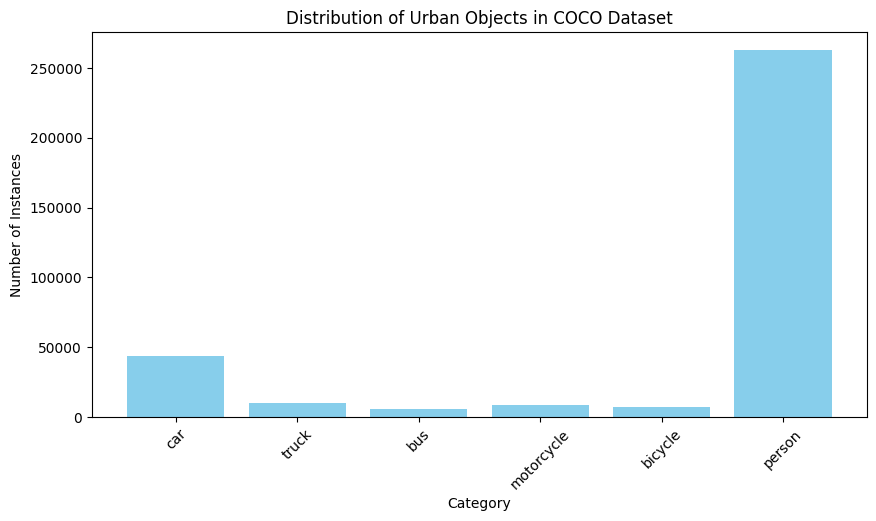

In [27]:
BASE_DIR = os.getenv("FIFTYONE_DATASET_PATH", os.path.expanduser("~/fiftyone/coco-2017"))

image_folder = os.path.join(BASE_DIR, "train/data/")
coco_annotation_path = os.path.join(BASE_DIR, "raw/instances_train2017.json")

coco = COCO(coco_annotation_path)

urban_categories = ["car", "truck", "bus", "motorcycle", "bicycle", "person"]

category_ids = coco.getCatIds(catNms=urban_categories)
image_ids = coco.getImgIds(catIds=category_ids)

categories = coco.loadCats(category_ids)
category_names = [cat['name'] for cat in categories]

category_counts = {cat: len(coco.getAnnIds(catIds=[coco.getCatIds(catNms=[cat])[0]])) for cat in urban_categories}

# Visualize category distribution
plt.figure(figsize=(10, 5))
plt.bar(category_counts.keys(), category_counts.values(), color='skyblue')
plt.xlabel("Category")
plt.ylabel("Number of Instances")
plt.title("Distribution of Urban Objects in COCO Dataset")
plt.xticks(rotation=45)
plt.show()



The category "person" dominates the dataset, significantly outnumbering other categories like cars, trucks, and bicycles.
Cars are the second most common object, but the count is much lower than people.
Trucks, buses, motorcycles, and bicycles have relatively small counts.
This imbalance could affect model training, as it may favor detecting people over other objects.

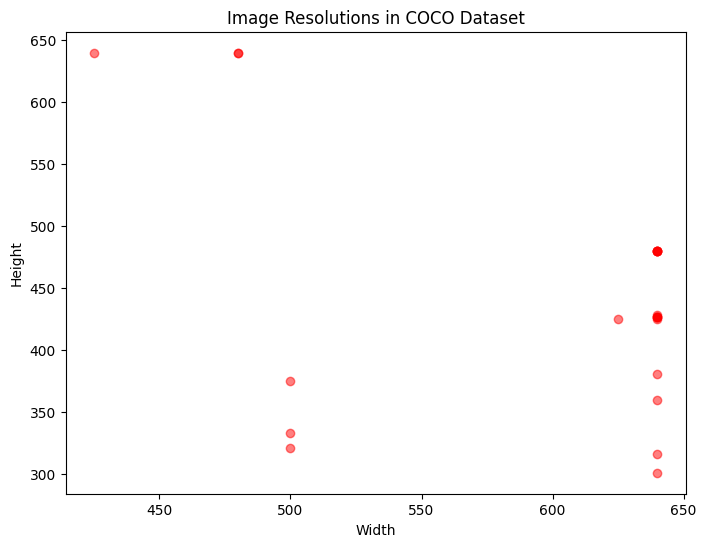

In [28]:
image_sizes = []
aspect_ratios = []
sample_size = min(10000, len(image_ids))   
for img_id in random.sample(image_ids, sample_size):
    img_info = coco.loadImgs(img_id)[0]
    width, height = img_info['width'], img_info['height']
    image_sizes.append((width, height))
    aspect_ratios.append(width / height)

widths, heights = zip(*image_sizes)

plt.figure(figsize=(8, 6))
plt.scatter(widths, heights, alpha=0.5, color='red')
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Resolutions in COCO Dataset")
plt.show()

The data points show some clustering, meaning the dataset contains images of specific standard resolutions.
There are a few outliers, which could be significantly larger or smaller images.

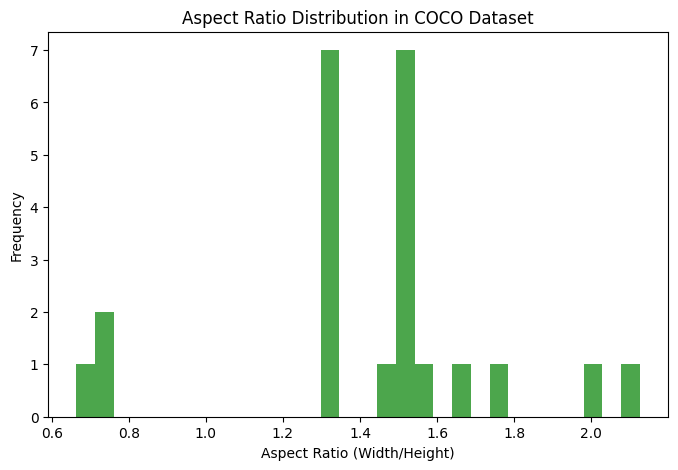

In [29]:
plt.figure(figsize=(8, 5))
plt.hist(aspect_ratios, bins=30, color='green', alpha=0.7)
plt.xlabel("Aspect Ratio (Width/Height)")
plt.ylabel("Frequency")
plt.title("Aspect Ratio Distribution in COCO Dataset")
plt.show()

The aspect ratio histogram shows distinct peaks around 1.4–1.6, indicating a standard image format.
Some images have extreme aspect ratios (wider or taller).

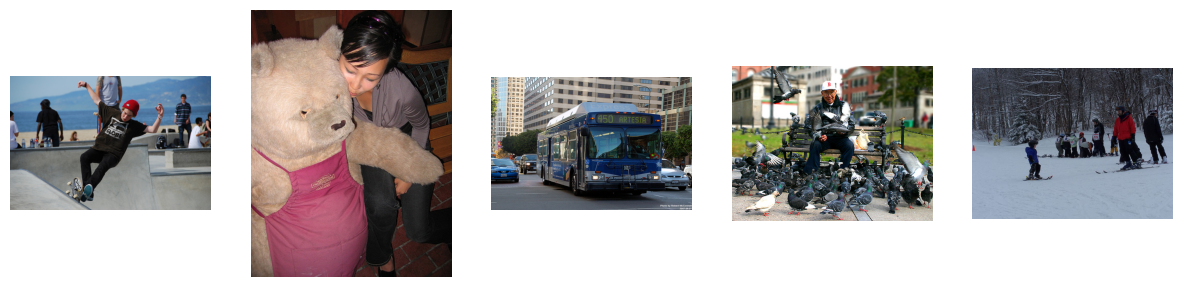

In [51]:
available_images = [f for f in os.listdir(image_folder)]

sample_images = random.sample(available_images, 5)

fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(image_folder, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    axs[i].imshow(img)
    axs[i].axis("off")

plt.show()


## Visualising the dataset
For reference, we are going to upload 500 images into the dataset using the FiftyOne library. FiftyOne is a powerful open-source library designed for exploring, visualizing, and managing large-scale image and video datasets. It provides an efficient way to work with datasets like COCO, making it easier to filter, query, and analyze images with metadata and annotations. Comes with an interactive GUI where one can scroll through images and view metadata.

In [56]:
dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    label_types=["detections"],
    classes=["person", "car", "truck", "bus", "motorcycle", "bicycle","train"],
    max_samples=1000,
)

Found annotations at '/Users/parimalasabau/fiftyone/coco-2017/raw/instances_train2017.json'
500 images found; downloading the remaining 500
 100% |██████████████████| 500/500 [2.2m elapsed, 0s remaining, 0.2 images/s]      
Writing annotations for 1000 downloaded samples to '/Users/parimalasabau/fiftyone/coco-2017/train/labels.json'
Dataset info written to '/Users/parimalasabau/fiftyone/coco-2017/info.json'
Loading 'coco-2017' split 'train'
 100% |███████████████| 1000/1000 [2.2s elapsed, 0s remaining, 451.1 samples/s]      
Dataset 'coco-2017-train-1000' created


In [57]:
session = fo.launch_app(dataset)


# Data Preprocessing

Since we are using YOLO as our base model, it is important to note that YOLO (You Only Look Once) does not require input images to have the same resolution before training.During preprocessing, all images are resized to a fixed size to ensure consistency in training and inference. For reference see training step.

When training a YOLO model, images of varying resolutions are resized to a predefined input size. 
To maintain the original aspect ratio while resizing, YOLO applies a technique called letterboxing, which:
- Scales the image so that it fits within the target resolution.
- Adds padding (black borders) to fill any remaining space, preserving the aspect ratio.

Therefor, preprocessing is not required.